# BENG 212 HW 5

##  Name: Kinshuk Sahu

### 3/3/2020

#### Resources
- An interesting read comparing statistics to ML: https://www.nature.com/articles/nmeth.4642 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Expression Data', index_col = 0)
metadata = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Experimental Conditions', index_col = 0)
gene_info = pd.read_excel('Homework_Data.xlsx', sheet_name = 'Gene Information', index_col = 0)

import random

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.linear_model import ElasticNet
from sklearn import metrics



In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/opt/conda/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

## Problem 1: Supervised learning methods

### A. Train a binary classifier to distinguish between the strains MG1655 and BW25113 for  the following two models.

#### A.i. Logistic Regression

In [4]:
MG_samples = metadata.index[metadata['Strain Description'] == 'Escherichia coli K-12 MG1655']  # only include the wild type,associations between conditions make sense if you make associations between related things 
BW_samples = metadata.index[metadata['Strain Description'] == 'Escherichia coli BW25113']

all_samples = MG_samples.append(BW_samples)


train_mg = random.sample(set(MG_samples), int(len(set(MG_samples))*0.7))   # use 70 percent data for training 
test_mg = list(set(MG_samples) - set(train_mg))   # utilising the property of sets to yield the remaining elements instead of actual subtracting plus fast! 

train_bw = random.sample(set(BW_samples), int(len(set(BW_samples))*0.7))
test_bw = list(set(BW_samples) - set(train_bw))


train_samples = train_mg + train_bw   # adding can be done like this in lists in python
test_samples = test_mg + test_bw




In [5]:
# since it is a binary classifier 

train_labels = (metadata.loc[train_samples, 'Strain Description'] == 'Escherichia coli BW25113') # composed of zeroes and ones
test_labels = (metadata.loc[test_samples, 'Strain Description'] == 'Escherichia coli BW25113')

lr = LogisticRegression(penalty='l1',solver='liblinear')

lr = lr.fit(data.loc[:, train_samples].T, train_labels)       # fitting on the training data   

p_lr = lr.score(data.loc[:, test_samples].T, test_labels)      # testing
p_lr

1.0

#### A.ii. Support Vector Machines

In [6]:
from sklearn import svm
clf=SVC(gamma='auto')
clf=clf.fit(data.loc[:, train_samples].T, train_labels)
p_svm = clf.score(data.loc[:, test_samples].T, test_labels) 
p_svm_rand = clf.score(data.loc[:, test_samples].T, [False]* len(test_labels) )  # seeing for random 
# testing
p_svm

1.0

### B. Interpret your models in terms of performance and influential variables.

In [108]:
def calculate_topgenes(lr):
    lr = lr.fit(data.loc[:, train_samples].T, train_labels)
    importance = lr.coef_[0]
    importance = pd.DataFrame(importance, index = data.index, columns = ['weight'])
    importance['abs_val'] = importance.weight.abs() # storing in dataframe in a particular column
    top5_lr = importance.sort_values('abs_val', ascending = False).iloc[0:5, :]
    return top5_lr,lr



In [109]:
lr = LogisticRegression('elasticnet', l1_ratio = 0.5, solver = 'saga') # no convergence error
top5,lr=calculate_topgenes(lr)
p = lr.score(data.loc[:, test_samples].T, test_labels)
display(p)
display(gene_info.loc[top5.index])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0

,start,stop,strand,gene_name,length,operon,cog
b3994,4194203,4196099,-,thiC,1896,thiCEFSGH,Coenzyme transport and metabolism
b3990,4190734,4191868,-,thiH,1134,thiCEFSGH,Coenzyme transport and metabolism
b3992,4192820,4193576,-,thiF,756,thiCEFSGH,No COG Annotation
b3993,4193568,4194204,-,thiE,636,thiCEFSGH,Coenzyme transport and metabolism
b3991,4191864,4192635,-,thiG,771,thiCEFSGH,Coenzyme transport and metabolism


In [45]:
lr = LogisticRegression('elasticnet', l1_ratio = 0, solver = 'saga') # no convergence error just like l2
top5,lr=calculate_topgenes(lr)
p = lr.score(data.loc[:, test_samples].T, test_labels)
display(p)
display(gene_info.loc[top5.index])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0

,start,stop,strand,gene_name,length,operon,cog
b3990,4190734,4191868,-,thiH,1134,thiCEFSGH,Coenzyme transport and metabolism
b3994,4194203,4196099,-,thiC,1896,thiCEFSGH,Coenzyme transport and metabolism
b3993,4193568,4194204,-,thiE,636,thiCEFSGH,Coenzyme transport and metabolism
b3992,4192820,4193576,-,thiF,756,thiCEFSGH,No COG Annotation
b3991,4191864,4192635,-,thiG,771,thiCEFSGH,Coenzyme transport and metabolism


In [47]:
lr = LogisticRegression('elasticnet', l1_ratio = 1, solver = 'saga') # no convergence error just like l1
top5,lr=calculate_topgenes(lr)
p = lr.score(data.loc[:, test_samples].T, test_labels)
display(p)
display(gene_info.loc[top5.index])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


1.0

,start,stop,strand,gene_name,length,operon,cog
b3990,4190734,4191868,-,thiH,1134,thiCEFSGH,Coenzyme transport and metabolism
b3994,4194203,4196099,-,thiC,1896,thiCEFSGH,Coenzyme transport and metabolism
b3993,4193568,4194204,-,thiE,636,thiCEFSGH,Coenzyme transport and metabolism
b3992,4192820,4193576,-,thiF,756,thiCEFSGH,No COG Annotation
b3991,4191864,4192635,-,thiG,771,thiCEFSGH,Coenzyme transport and metabolism


In [49]:
lr = LogisticRegression(penalty='l1',solver='liblinear') #  slightly different results from rest
top5,lr=calculate_topgenes(lr)
p = lr.score(data.loc[:, test_samples].T, test_labels)
display(p)
display(gene_info.loc[top5.index])

1.0

,start,stop,strand,gene_name,length,operon,cog
b0349,371238,372105,+,mhpC,867,mhpABCDFE,No COG Annotation
b3993,4193568,4194204,-,thiE,636,thiCEFSGH,Coenzyme transport and metabolism
b3990,4190734,4191868,-,thiH,1134,thiCEFSGH,Coenzyme transport and metabolism
b3992,4192820,4193576,-,thiF,756,thiCEFSGH,No COG Annotation
b3994,4194203,4196099,-,thiC,1896,thiCEFSGH,Coenzyme transport and metabolism


In [50]:
lr = LogisticRegression(penalty='l2',solver='lbfgs') #  slow
top5,lr=calculate_topgenes(lr)
p = lr.score(data.loc[:, test_samples].T, test_labels)
display(p)
display(gene_info.loc[top5.index])

1.0

,start,stop,strand,gene_name,length,operon,cog
b3990,4190734,4191868,-,thiH,1134,thiCEFSGH,Coenzyme transport and metabolism
b3994,4194203,4196099,-,thiC,1896,thiCEFSGH,Coenzyme transport and metabolism
b3993,4193568,4194204,-,thiE,636,thiCEFSGH,Coenzyme transport and metabolism
b3992,4192820,4193576,-,thiF,756,thiCEFSGH,No COG Annotation
b3991,4191864,4192635,-,thiG,771,thiCEFSGH,Coenzyme transport and metabolism


In [52]:
lr = LogisticRegression(penalty='l2',solver='newton-cg') #  slow
top5,lr=calculate_topgenes(lr)
p = lr.score(data.loc[:, test_samples].T, test_labels)
display(p)
display(gene_info.loc[top5.index])

1.0

,start,stop,strand,gene_name,length,operon,cog
b3990,4190734,4191868,-,thiH,1134,thiCEFSGH,Coenzyme transport and metabolism
b3994,4194203,4196099,-,thiC,1896,thiCEFSGH,Coenzyme transport and metabolism
b3993,4193568,4194204,-,thiE,636,thiCEFSGH,Coenzyme transport and metabolism
b3992,4192820,4193576,-,thiF,756,thiCEFSGH,No COG Annotation
b3991,4191864,4192635,-,thiG,771,thiCEFSGH,Coenzyme transport and metabolism


In [260]:
# doing for SVD #function

clf=SVC(gamma='auto',kernel='linear')

def calculate_topgenes_svd(clf):
    clf=clf.fit(data.loc[:, train_samples].T, train_labels)
    importance = lr.coef_[0]
    importance = pd.DataFrame(importance, index = data.index, columns = ['weight'])
    importance['abs_val'] = importance.weight.abs() # storing in dataframe in a particular column
    top5_lr = importance.sort_values('abs_val', ascending = False).iloc[0:5, :]
    return top5_lr,clf

top5,clf=calculate_topgenes_svd(clf)
p = clf.score(data.loc[:, test_samples].T, test_labels)
display(p)
display(gene_info.loc[top5.index])

1.0

,start,stop,strand,gene_name,length,operon,cog
b0349,371238,372105,+,mhpC,867,mhpABCDFE,No COG Annotation
b3990,4190734,4191868,-,thiH,1134,thiCEFSGH,Coenzyme transport and metabolism
b0572,595599,596973,+,cusC,1374,cusCFBA,Cell wall/membrane/envelope biogenesis
b0062,66834,68337,-,araA,1503,araBAD,Carbohydrate transport and metabolism
b3992,4192820,4193576,-,thiF,756,thiCEFSGH,No COG Annotation


We observe the following displayed performances and 5 influential variables.In the case of logistic regression, we varied different parameters like the solver, the penalty, the ratio etc and found out that most of the important genes, identified by their weights were those involved in coenzyme transport and metabolism.  In case of Support Vector Machines, we also observed that there were some genes that were involved in cell wall biogenesis and carbohydrate metabolism. These differences kind of indicate that these feautres are expressed highly by one strain and low by other or vice versa. The performance was pretty accurate for all the cases, at least for the lenient metric(R^2 values) that we used in our studies. This shows that our logistic regressor or svd is a good classifier. 

 ### C. Train a regression model to predict expression of rpoB (b3987) from the expression of all other genes, for each of the following approaches. Repeat the analysis in part b.
         
#### C.i. Simple linear regression


In [275]:


rpob=data.loc['b3987']
no_rpob=data.drop('b3987')


train_samples=random.sample(list(data.columns),int(no_rpob.shape[1]*0.75)) # 
test_samples = list(set(data.columns)-set(train_samples))

train_no_rpob=no_rpob[train_samples]
test_no_rpob=no_rpob[test_samples]
  

# instead of binary classifier where we had zeroes and ones as the output, now we have the expression of rpoB as the output 

train_labels=data.loc['b3987',train_no_rpob.columns]
test_labels=data.loc['b3987',test_no_rpob.columns]

lm=LinearRegression()


lm = lm.fit(no_rpob.loc[:, train_no_rpob.columns].T, train_labels.T,sample_weight=None)       # fitting on the training data   

p_lm = lm.score(no_rpob.loc[:, test_no_rpob.columns].T, test_labels.T,sample_weight=None)      # testing
display(p_lm)
importance = lm.coef_
importance = pd.DataFrame(importance, index = no_rpob.index, columns = ['weight'])
importance['abs_val'] = importance.weight.abs() # storing in dataframe in a particular column
top5_lm = importance.sort_values('abs_val', ascending = False).iloc[0:5, :]
display(gene_info.loc[top5_lm.index])                            



0.8970518368188798

,start,stop,strand,gene_name,length,operon,cog
b0572,595599,596973,+,cusC,1374,cusCFBA,Cell wall/membrane/envelope biogenesis
b2145,2233599,2233839,+,yeiS,240,sanA-yeiS,Function unknown
b3993,4193568,4194204,-,thiE,636,thiCEFSGH,Coenzyme transport and metabolism
b2000,2071538,2074658,+,flu,3120,isrC-flu,Cell wall/membrane/envelope biogenesis
b0557,578599,578893,-,borD,294,borD,Function unknown


For simple linear regression, the performance is accurate , with R^2 value greater than 0.90 in nmost of the runs. Also we observe that in most of the runs the top weighted component is the cusC gene involved in cell wall biogenesis. This result is somewhat surprising too since the rpoB gene is involved in transcription. But wehn looked at the weight, we find that it is a negative weight, which can be explained as when the cell is actively growing (like if rpoB prodn is high), it doesn't need energy for cell wall synthesis . Cell wall synthesis will be required when the cell is undergoing cell division, when replication rate is high. Simultaneous occuring of both is relatively rare.  

#### C.ii. Regression trees (be sure to set a reasonable depth which is slightly less than the automatically selected maximum depth in order to prevent overfitting)

In [123]:
clf = tree.DecisionTreeRegressor(max_depth=7)
clf = clf.fit(no_rpob.loc[:, train_no_rpob.columns].T, train_labels.T)
p_dt=clf.score(no_rpob.loc[:, test_no_rpob.columns].T, test_labels.T)
display(p_dt)

depth=clf.get_depth()
display(depth)

# for visualising
import graphviz 
clf_visualize = tree.export_graphviz(clf,filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(clf_visualize) 
graph 

0.8841806892294525

7

[Text(170.16367924528302, 203.85, 'X[3409] <= 7.362\nmse = 0.108\nsamples = 76\nvalue = 7.378'),
 Text(66.13089622641509, 176.67000000000002, 'X[3414] <= 5.724\nmse = 0.047\nsamples = 35\nvalue = 7.114'),
 Text(25.267924528301887, 149.49, 'X[367] <= 4.387\nmse = 0.013\nsamples = 10\nvalue = 6.807'),
 Text(12.633962264150943, 122.31, 'X[969] <= 4.99\nmse = 0.003\nsamples = 5\nvalue = 6.905'),
 Text(6.316981132075472, 95.13, 'X[1358] <= 3.751\nmse = 0.0\nsamples = 2\nvalue = 6.974'),
 Text(3.158490566037736, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = 6.984'),
 Text(9.475471698113207, 67.94999999999999, 'mse = 0.0\nsamples = 1\nvalue = 6.964'),
 Text(18.950943396226414, 95.13, 'X[2804] <= 8.14\nmse = 0.0\nsamples = 3\nvalue = 6.86'),
 Text(15.79245283018868, 67.94999999999999, 'X[5] <= 2.497\nmse = 0.0\nsamples = 2\nvalue = 6.857'),
 Text(12.633962264150943, 40.77000000000001, 'mse = 0.0\nsamples = 1\nvalue = 6.855'),
 Text(18.950943396226414, 40.77000000000001, 'mse = 0.0\nsampl

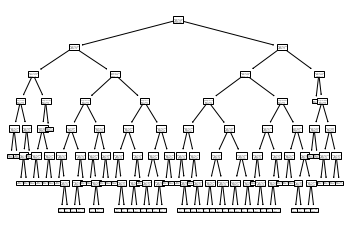

In [17]:
tree.plot_tree(clf.fit(data.loc[:, train_no_rpob.columns].T, train_labels.T) )b

We simulate the trees for varying depths and observe that at depth =7, the tree is not overfitting any more, like the test value R^2 are increasing towards 1. 

## 2. Regularization

### A. Discuss the following types of regularization.

#### A.i. L1 and L2 penalties

We need to regularize our model so that it is generalisable, and is not overfitted. By constraining the model by adding more information, we make the solutions proposed by the model more likely. In L1 an L2 penalties, we make the penalties on complexity. Addition of one more parameter into the model increases the chanced of overfitting and by adding these penalties we try to minimize that.A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

Mathematically, L2 regression adds an exponential(square) dependency of the weight produced by including a parameter, and L1 regression adds the absolute value of weight, and the numbers in L come from how L1 and L2 norms are defined. They are given by 

 L1 regularization : Cost= Error + $\lambda$ Σ $|w_i|$ 
 L2 regularization : Cost= Error + $\lambda$ Σ $w_i^2$ 
 
 where error= Σ $y_i$-($Σx_{i,j} * \beta_j$)

The differences in the penalties make the L1 penalty more influenced to reach the zero weights solution and L2 is less likely. Intuitively speaking, we can say that adding the error term makes it less overfit because it reduces the total parameters it can add. If it adds complex parameters which doesn't increase the fitness too much, it better avoid that feautre all together.  


#### A.ii. Boosting, bagging, and pruning trees

As we discussed above, we try to acheive our main motive of reducing overfitting and we can do this by boosting, bagging or pruning, which is done specifically in decision trees. 

Boosting trees involve using an approach where we reduce the complexity(strong data, weak model) of the tree, i.e the tree cannot extend beyond a certain depth. We do this a bunch of times(adding shallow trees) and thus in principle we can get an ensemble of weaker models that are more robust than the overfit models, and hence more generalizable. This type of approach focusses on mispredictions, and some of the more commonly used boosting techniques include gradient boosing techniques and AdaBoost(Adaptive boosting)

Bagging trees in contrast with boosting trees we have weak data to train sub models.This "weak" data is got from bootstrapping ,which essentially means sampling a subpopulation WITH REPLACEMENT. 

Pruning tress is kind of like the l1 and l2 regression, in the sense that we remove sections of the tree that do not improve performance, either through reduced error pruning, where we replace each node with the common leaf below it, and see how the error is affected, or through reduced complexity pruning, where we remove subtrees based on complexity, like removing branches that do not contribute much to overall fitting of the model. 

#### A.iii. Early stopping

This technique is an another approach to reduce overfitting in our models. The problem with overfitting is that the model tries to include more and more complex paramters to reduce the training error, but it doesn't know that it is essentially overfitting the model. we try to modify this by dividing some parts of the training data into training plus validation. The training in the training set takes place only until the validation error keeps on improving. If there is no improvement in validation set, or if it decreases then the training is stopped(and checked on testing data). This early stopping is also similar to boosting, where we do not go beyond a certain depth. 

### B. Implement elastic net regression for the linear regression in part 1c. Vary L1 and L2 weights and evaluate the performance of the model.

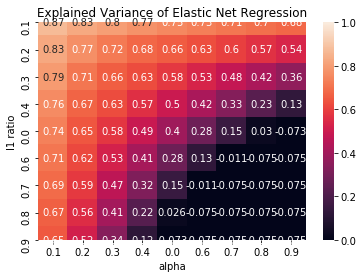

In [292]:
# elastic net LINEAR regression 

# dataframe with alpha as rows and l1 ratios as the coloumns, computed performance metric as each entry

alpha=np.arange(0.1,1,0.1)
l1_ratio=np.arange(0.1,1,0.1)
MAT_perf=np.zeros((len(alpha),len(l1_ratio)))
# MAT_perf_db=pd.DataFrame(MAT_perf)  

rpob=data.loc['b3987']
no_rpob=data.drop('b3987')
train_samples=random.sample(list(data.columns),int(no_rpob.shape[1]*0.75)) # 
test_samples = list(set(data.columns)-set(train_samples))
train_no_rpob=no_rpob[train_samples]
test_no_rpob=no_rpob[test_samples]

train_labels=data.loc['b3987',train_no_rpob.columns]
test_labels=data.loc['b3987',test_no_rpob.columns]


count1=0


for i in alpha:
    count2=0
    for j in l1_ratio:
        regr = ElasticNet(alpha=i,l1_ratio=j)
        
        regr = regr.fit(no_rpob.loc[:, train_no_rpob.columns].T, train_labels.T)       # fitting on the training data   

        p_regr = regr.score(no_rpob.loc[:, test_no_rpob.columns].T, test_labels.T)      # testing # changing rpoB to data

        MAT_perf[count1,count2]=p_regr
        
        count2+=1
    count1+=1
    
    
MAT_perf_db=pd.DataFrame(MAT_perf,index=[0.1,0.2,0.3,0.4,0.,0.6,0.7,0.8,0.9],columns=[0.1,0.2,0.3,0.4,0.,0.6,0.7,0.8,0.9])  
ax=sns.heatmap(MAT_perf_db,annot=True,vmin=0, vmax=1)    
ax.set(xlabel='alpha', ylabel='l1 ratio',title='Explained Variance of Elastic Net Regression')
plt.show()

We see that when L1 ratio is the least, and the alpha is the least too, both equal to 0.1, the performance is the best. We see a gradual transition either when the l1 ratio decreases or alpha value decreases, and a sudden drop in performance when both decrease simuntaneuosly. The performance metric here are the R^2 values. 

## 3. Model Assessment

### A. Construct PR and ROC curves for the SVM model you generated in problem 1a. 

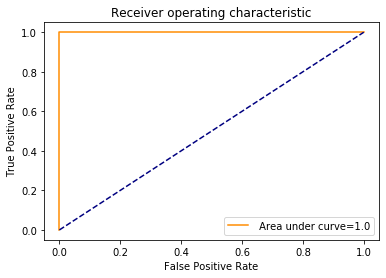

In [304]:
train_mg = random.sample(set(MG_samples), int(len(set(MG_samples))*0.7))   # use 70 percent data for training 
test_mg = list(set(MG_samples) - set(train_mg))   # utilising the property of sets to yield the remaining elements instead of actual subtracting plus fast! 

train_bw = random.sample(set(BW_samples), int(len(set(BW_samples))*0.7))
test_bw = list(set(BW_samples) - set(train_bw))


train_samples = train_mg + train_bw   # adding can be done like this in lists in python
test_samples = test_mg + test_bw


train_labels = (metadata.loc[train_samples, 'Strain Description'] == 'Escherichia coli BW25113') # composed of zeroes and ones
test_labels = (metadata.loc[test_samples, 'Strain Description'] == 'Escherichia coli BW25113')



from sklearn import svm
clf=SVC(gamma='auto',probability=True)
clf=clf.fit(data.loc[:, train_samples].T, train_labels)
p_svm = clf.score(data.loc[:, test_samples].T, test_labels) 

p = clf.predict_proba(data.loc[:, test_samples].T)
fpr, tpr, _ = metrics.roc_curve(test_labels,  p[:,1]) # KEEPING prob from poitive outcome only
auc = metrics.roc_auc_score(test_labels, p[:,1])

#Plotting the ROC
plt.plot(fpr,tpr,color='darkorange',label=" Area under curve="+str(auc))
plt.plot([0, 1], [0, 1],color='navy', linestyle='--')
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve, we observe that the AUC is close to 1, so our classifier is working perfectly, distinguishing ones as ones and zeroes as zeroes. We can see that in the noramlized confusion matrix as well. 

In [288]:
#Plotting precision curve
average_precision = metrics.average_precision_score(test_labels, p[:,1])
metrics.plot_precision_recall_curve(clf, data.loc[:, test_samples].T, test_labels)
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show(None)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_precision_recall_curve'

### B. Choose a threshold value for classification based on your results from 3a and construct a confusion matrix at this threshold.

In [305]:

p = clf.predict_proba(data.loc[:, test_samples].T)


new_labels = (p[:,0] >= 0.5)  # medium threshold 
b=list(new_labels)
#replacing all False with 0 for MG strain and True with 1 for BW strains)
logical_b=[0 if x==True else 1 for x in b ]

#display the map with normalization
disp = plot_confusion_matrix(clf, data.loc[:, test_samples], logical_b,display_labels=[0,1],cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title('Confusion matrix')
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

### C. Resampling

#### C.i. Perform bootstrapping on your data (100x) to calculate your confidence intervals for your 1c model performance and model coefficients.

In [225]:
# Bootstrapping the model performance
from sklearn.utils import resample
bs_train=np.zeros((100))
rpob=data.loc['b3987']
no_rpob=data.drop('b3987')
importance_pd = pd.DataFrame(np.zeros((no_rpob.shape[0],100)), index =no_rpob.index, columns =np.arange(100))

# Store performance metric in this array
perf_boot=np.zeros((100))

for i in range(100):

    bs_train = resample(no_rpob.transpose(), n_samples = int(no_rpob.shape[1]*0.75)).T # while resampling using n_samples=root p, like it does in random forest 

  
    bs_test=no_rpob[list(set(no_rpob.columns)-set(bs_train.columns.unique()))] 

    # now for labels 

    bs_train_labels=data.loc['b3987',bs_train.columns]  # 
    bs_test_labels=data.loc['b3987',bs_test.columns]  


    lm=LinearRegression()


    lm = lm.fit(no_rpob.loc[:, bs_train.columns].T, bs_train_labels.T)       # fitting on the training data   
    importance = lm.coef_
 
    p_lm = lm.score(no_rpob.loc[:, bs_test.columns].T, bs_test_labels.T)      # testing

    perf_boot[i]=p_lm
    
    
   
    importance_pd.iloc[:,i]=importance.T


   


In [226]:
    
# now calculating the confidence intervals 

# for the performance metric 0---R2 used in our study 
alpha = 0.95  # 95 percent confidence interval
p = ((1.0-alpha)/2.0) * 100   
lower = max(0.0, np.percentile(perf_boot, p))   # selecting values at 2.5 percentile
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(perf_boot, p))  # selecting values at 97.5 percentile
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


# for the coeffecients 
lower=np.zeros(no_rpob.shape[0])
upper=np.zeros(no_rpob.shape[0])

for j in range(no_rpob.shape[0]):
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100   
    lower[j] =  np.percentile(importance_pd.iloc[j,:], p)   # selecting values at 2.5 percentile
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper[j] =  np.percentile(importance_pd.iloc[j,:], p) # selecting values at 97.5 percentile

conf_coeff=pd.DataFrame(np.stack((lower,upper),axis=-1), index = no_rpob.index, columns =['Lower Bound','Upper bound'])   
display(conf_coeff)

95.0 confidence interval 80.4% and 96.2%


,Lower Bound,Upper bound
b0002,-0.024777,0.026037
b0003,-0.007669,0.007229
b0004,-0.002841,0.008115
b0005,-0.003542,0.002704
b0006,-0.003098,0.008215
b0007,-0.002495,0.005825
b0008,-0.001954,0.002153
b0009,-0.001829,0.003071
b0010,-0.002244,0.002296
b0011,-0.003019,0.001749


#### C.ii. Perform 5-fold cross-validation (100x) to assess model overfitting.

In [247]:
# 
from sklearn.model_selection import KFold

X=data.drop('b3987').T
y=data.loc['b3987'].T

perf_test=np.zeros((100,5))
perf_train=np.zeros((100,5))
kf = KFold(n_splits=5, shuffle = True) #5-fold cv
n_iter = 100


for i in range(n_iter): # 100 splits
    count=0
    for train_index, test_index in kf.split(X): 
        
        #generate model
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Do analysis
        lm=LinearRegression()


        lm = lm.fit(X_train, y_train)       # fitting on the training data   
       
 
        p_lm_test = lm.score(X_test, y_test)      # testing
        p_lm_train= lm.score(X_train, y_train)     #training
        
        # save output
        perf_test[i,count]=p_lm_test
        perf_train[i,count]=p_lm_train
        count+=1
        
        

Text(0, 0.5, 'R square value(Metric used in this study)')

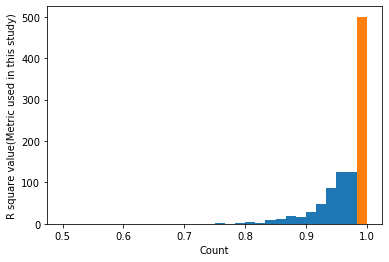

In [255]:
# plotting histogram to see how the metrics that we have chosen vary amongst each other

# reshaping into a single array
perf_test.reshape((500,1))


fig, ax = plt.subplots()
ax.hist(perf_test.reshape((500,1)), bins = 30, range = [0.5, 1])
ax.hist(perf_train.reshape((500,1)), bins = 30, range = [0.5, 1])
ax.set_xlabel('Count')
ax.set_ylabel('R square value(Metric used in this study)')


We see that there is still some significant difference between the training data and testing data distribution, indicating that there is some overfitting, as our model has not been able to generalize very well hence the spread around 0.9-1 region. 

### D. Variable importance

#### D.i. Based on your bootstrapped models, which variables appear the most important at distinguishing between the strains MG1655 and BW25113?

In [227]:
# most important genes-- from bootstrapping analysis
# 3 things, first the average, then the absolute value, then sort that
imp_genes=np.zeros((no_rpob.shape[0]))
for i in range(no_rpob.shape[0]):
    imp_genes[i]=(conf_coeff.iloc[i,0]+conf_coeff.iloc[i,1])/2
importance = pd.DataFrame(imp_genes, index = no_rpob.index, columns = ['weight'])
importance['abs_val'] = importance.weight.abs() # storing in dataframe in a particular column
top5_comp = importance.sort_values('abs_val', ascending = False).iloc[0:5, :]
display(top5_comp)                    

,weight,abs_val
b0572,-0.004639,0.004639
b3993,0.003914,0.003914
b3992,0.003622,0.003622
b3994,0.003551,0.003551
b3991,0.003353,0.003353


We see that the gene cusC, encoded at the base pair b0572 appears to be the most important at distinguishing between the strains MG1655 and BW25113. This was also seen in our initial studies without bootstrapping where the gene came in the top5 in most realizations. 

#### D.ii. Take your top variable by importance and permute it (randomly shuffle it) - how is your model performance affected? Compare this to the performance change from permuting a variable not considered to be important in your model.

In [230]:
# randomly shuffling it along the samples, data is the no_rpob data
no_rpob_mod=data.drop('b3987')
random.shuffle(no_rpob_mod.loc['b0572'].values)

train_samples_mod=random.sample(list(data.columns),int(no_rpob_mod.shape[1]*0.75)) # 
test_samples_mod = list(set(data.columns)-set(train_samples_mod))

train_no_rpob_mod=no_rpob_mod[train_samples_mod]
test_no_rpob_mod=no_rpob_mod[test_samples_mod]

train_labels_mod=data.loc['b3987',train_no_rpob_mod.columns]
test_labels_mod=data.loc['b3987',test_no_rpob_mod.columns]

lm_mod=LinearRegression()


lm_mod = lm_mod.fit(no_rpob_mod.loc[:, train_no_rpob_mod.columns].T, train_labels_mod.T,sample_weight=None)       # fitting on the training data   

p_lm_mod = lm_mod.score(no_rpob_mod.loc[:, test_no_rpob_mod.columns].T, test_labels_mod.T,sample_weight=None)      # testing
p_lm_mod


0.940195231320924

We see that in most runs there is not much of a performance change(or just a slight increase or decrease ),where we randomly shuffle the most important locus, and this indicates that although that gene is important, it has different possible scenarios where its effect will not be diminished, which can happen when for example when the sample conditions are similar. But we also observe that the some times there is a huge drop, more than that is seen in the locuses which do not play an important role(non important genes show similar effect on performance upon mutation almost most of the time). This can be also thought of as some threshold response, where if it exists above that then not much change will happen, but if it is less than that, then there will be a huge drop. 

In [ ]:
# randomly shuffling it along the samples, data is the no_rpob data
no_rpob_mod=data.drop('b3987')
random.shuffle(no_rpob_mod.loc['b0019'].values)

train_samples_mod=random.sample(list(data.columns),int(no_rpob_mod.shape[1]*0.75)) # 
test_samples_mod = list(set(data.columns)-set(train_samples_mod))

train_no_rpob_mod=no_rpob_mod[train_samples_mod]
test_no_rpob_mod=no_rpob_mod[test_samples_mod]

train_labels_mod=data.loc['b3987',train_no_rpob_mod.columns]
test_labels_mod=data.loc['b3987',test_no_rpob_mod.columns]

lm_mod=LinearRegression()


lm_mod = lm_mod.fit(no_rpob_mod.loc[:, train_no_rpob_mod.columns].T, train_labels_mod.T,sample_weight=None)       # fitting on the training data   

p_lm_mod = lm_mod.score(no_rpob_mod.loc[:, test_no_rpob_mod.columns].T, test_labels_mod.T,sample_weight=None)      # testing
p_lm_mod